In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func


import numpy as np

import pandas as pd

import datetime as dt
from datetime import date, timedelta

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Map engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [3]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [4]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [6]:
Vac_Start = dt.datetime(2019, 2, 14)
Vac_Starting = Vac_Start.strftime('%Y-%m-%d')
VacationDays = 10
Vac_End = Vac_Start + dt.timedelta(days = 10)
Vac_Ending = Vac_End.strftime('%Y-%m-%d')
print(Vac_Start)
print(Vac_End)

2019-02-14 00:00:00
2019-02-24 00:00:00


# Exploratory Climate Analysis

In [7]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates


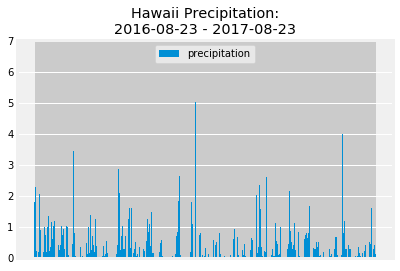

In [8]:
#### Identify last date in data
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

### Identify date 1 year ago from last_date
yearF_last_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
# Converting the string last_date into a date time so it matches the formatting for visual labels...
yearB_last_date = yearF_last_date + dt.timedelta(days = 365)

## Session query to pull the last years worth of preciptation data from data
yeardata = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= yearF_last_date).all()

## Creating a DataFrame with the yeardata query info
precepDF = pd.DataFrame(yeardata, columns = ['date', 'prcp'])
precepDF.set_index('date', inplace = True)
precepDF.sort_values('date')

## Creating a bar graph of the data
x = precepDF.index
y = precepDF.prcp
plt.title(f"Hawaii Precipitation:\n{yearF_last_date} - {yearB_last_date}")
plt.tick_params(axis='both',
                labelbottom=False)

plt.bar(x, y, label='precipitation')
plt.legend(loc='upper center')
plt.rc('grid', color='black')
plt.grid(b=True, which='both', axis='y', color='white', linestyle="-")

plt.show()



# Use Pandas to calcualte the summary statistics for the precipitation data


In [9]:
# Summary Statistics for the preciptiation data
precepDF.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# How many stations are available in this dataset?


In [10]:
## How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

# What are the most active stations?
# List the stations and the counts in descending order.

In [11]:
# What are the most active stations?
# List the stations and the counts in descending order.
stationcount=session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station)
stationcountordered=stationcount.order_by(func.count(Measurement.tobs).desc()).all()
stationcountordered

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

# Min, Max, and Avg Temp of most Active Station

In [12]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

sel =[func.min(Measurement.tobs),
     func.max(Measurement.tobs),
     func.avg(Measurement.tobs)]

most_active_stationStats = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()
most_active_stationStats

[(54.0, 85.0, 71.66378066378067)]

# Choose the station with the highest number of temperature observations.
## Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [ ]:
# Choose the station with the highest number of temperature observations.



In [13]:
## Session query to pull the last years worth of temperature data from data
yeardatatemp = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= yearF_last_date).\
    filter(Measurement.station == "USC00519281").all()
## Creating a DataFrame with the year data query info
temperature = pd.DataFrame(yeardatatemp, columns = ['date', 'tobs'])
temperature.head(5)

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


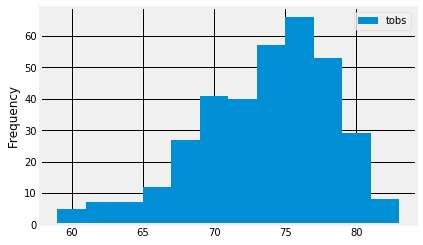

In [14]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
x = temperature.tobs
plt.hist(x, bins = 12, label = "tobs")
plt.ylabel("Frequency")

plt.legend()
plt.show()

# Calc Temps

In [15]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


## Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
## for your trip using the previous year's data for those same dates.


In [16]:
### I may have misunderstood the initial instructions. I had to go 2 years back from my proposed vacation date to find data

VacStart_comp = Vac_Start - dt.timedelta(days = 365*2)
VacEnd_comp = Vac_End - dt.timedelta(days = 365*2)
vac_outlook = (calc_temps(VacStart_comp, VacEnd_comp))

# flatten the nested list vac_outlook result into an indexable list
Vac_calcTemps = [float(x) for xs in vac_outlook for x in xs]
Vac_calcTemps

[65.0, 71.12903225806451, 77.0]

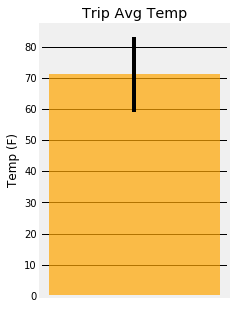

In [17]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

#Variables
AvgTemp = Vac_calcTemps[1]
y = 1
yerr = Vac_calcTemps[2]-Vac_calcTemps[0]

#Figure
fig, ax = plt.subplots(figsize=(3,5))
ax.yaxis.grid(which='major', color='black', linestyle='-', linewidth=1)
ax.xaxis.grid(b=False)
plt.tick_params(labelbottom=False)
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.bar(y, AvgTemp, yerr = yerr, color='orange', alpha=0.7)
plt.show()

In [18]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

stationcount=session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station)
stationcountordered=stationcount.order_by(func.count(Measurement.tobs).desc()).all()


Vac_Prec = session.query(Measurement.station,func.sum(Measurement.prcp)).group_by(Measurement.station).\
    filter(Measurement.date >= VacStart_comp).\
    filter(Measurement.date <= VacEnd_comp).all()
## Creating a DataFrame with the year data query info
Vac_PercDF = pd.DataFrame(Vac_Prec, columns = ['station', 'prcp'])
Vac_PercDF.head(5)

,station,prcp
0,USC00513117,0.86
1,USC00514830,0.79
2,USC00516128,0.69
3,USC00517948,0.17
4,USC00519281,1.02


## Optional Challenge Assignment

In [19]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [20]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
#print(calc_temps('2012-02-28', '2012-03-05'))
# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

# Create date delta, how many days in Hawaii
delta = Vac_End - Vac_Start

# hold list of all dates in date range
specific_dates = []

# hold results until converted to DF
normtemps = []

# Loop to create list of days
for i in range(delta.days):
    specificday = (Vac_Start + timedelta(i))
    fixed_date = specificday.strftime('%m-%d')
    specific_dates.append(fixed_date)

# Loop to populate numbers in normtemps list
for i in specific_dates:
    tempnums = daily_normals(i)
    normtemps.append({'Date':i,
                         'Min':tempnums[0][0],
                        'Avg':tempnums[0][1],
                         'Max':tempnums[0][2]})

# Convert list to DF and organize columns
normtempsDFtemp = pd.DataFrame(normtemps)
normtempsDF = normtempsDFtemp[["Date", "Min", "Avg", "Max"]]
normtempsDF.set_index('Date', inplace=True)
normtempsDF

,Min,Avg,Max
Date,,,
02-14,62.0,70.894737,79.0
02-15,56.0,70.288136,79.0
02-16,59.0,70.482143,76.0
02-17,62.0,70.472727,77.0
02-18,63.0,70.796296,77.0
02-19,60.0,69.339623,77.0
02-20,63.0,70.140351,76.0
02-21,63.0,69.796296,76.0
02-22,60.0,70.157895,83.0


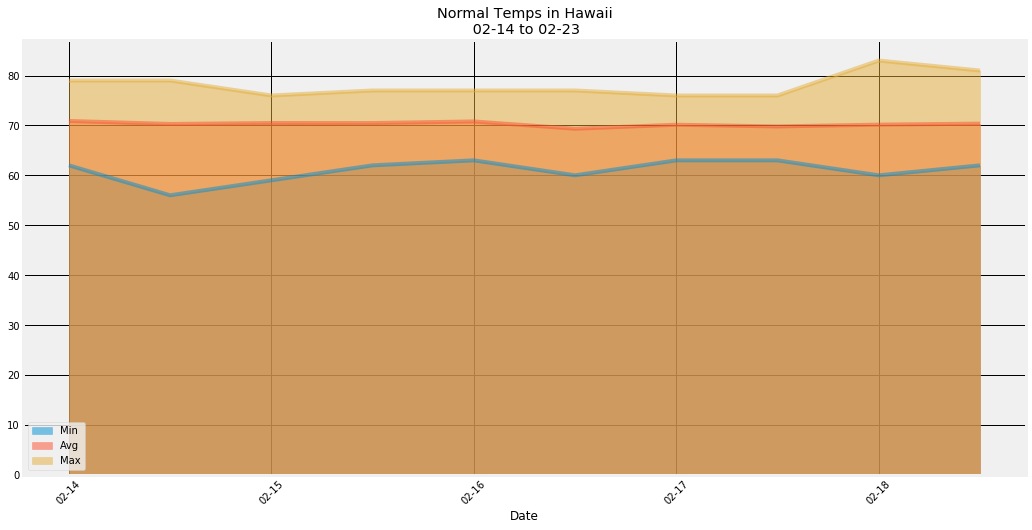

In [21]:
# Plot the daily normals as an area plot with `stacked=False`
# X = normtempsDF.index
normtempsDF.plot.area(stacked=False, figsize=(16,8));
plt.gca().xaxis.grid(True)
locs, labels = plt.xticks();
plt.xticks(locs[1:len(locs)-1], specific_dates, rotation=45);
plt.title(f"Normal Temps in Hawaii\n {normtempsDF.index[0]} to {normtempsDF.index[-1]}")
plt.show()

In [22]:
######### Testing a query for flask app
results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >=VacStart_comp).all()
results

[(58.0, 75.29775784753363, 87.0)]